In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# from matplotlib import font_manager, rc
# import matplotlib.pyplot as plt
# plt.rc('font', family = 'Malgun Gothic')

In [3]:
with open("/content/drive/MyDrive/data2.pickle","rb") as fr:
    data = pickle.load(fr)

In [4]:
data['최종등급'] = data['금액등급'].apply(lambda x : str(x)) + data['건수등급'].apply(lambda x : str(x))
data

,접수월,가맹점업종분류명_대,가맹점업종분류명,연령대코드,성별코드,광역시도명,시군구명,금액지표,건수지표,금액등급,건수등급,최종등급
0,202207,보건/위생,화 장 품,70,1,강원,강릉시,145.0,89.0,2,3,23
1,202207,보건/위생,의료 용품,30,1,강원,강릉시,56.0,157.0,4,2,42
2,202207,보건/위생,의료 용품,40,1,강원,강릉시,800.0,290.0,1,1,11
3,202207,보건/위생,사우나,30,2,강원,강릉시,44.0,27.0,4,4,44
4,202207,보건/위생,사우나,60,2,강원,강릉시,45.0,39.0,4,4,44
...,...,...,...,...,...,...,...,...,...,...,...,...
3548444,202306,기타,기계 공구,50,2,충북,충주시,71.0,127.0,3,2,32
3548445,202306,기타,기계 공구,60,2,충북,충주시,174.0,142.0,2,2,22
3548446,202306,기타,비 영 리,50,1,충북,충주시,88.0,142.0,3,2,32
3548447,202306,기타,비 영 리,70,2,충북,충주시,51.0,40.0,4,4,44


In [5]:
# data['최종등급']
data['count'] = 1
data.groupby(['최종등급']).agg({'count' : 'sum'})

,count
최종등급,
11,657638
12,173802
13,39068
14,13722
21,137667
22,474931
23,223249
24,43749
31,41948


In [6]:
mapper ={   '11': '활기찬 건강미인(HBMA)',
            '12'  : '화합의 리더(FCNA)',
            '13' : '열정적인 혁신가(ITMM)',
            '14' : '스마트한 디지털 라이프 리더(TDMM)',
            '21': '활기찬 액티비티 라이프 리더(HBNE)',
            '22' : '세계 음식 탐험가(FDNA)',
            '23' : '로컬 라이프 크리에이터(DKNA)',
            '24' : '트렌디한 라이프 크리에이터(MZMM)',
            '31'  : '편리한 라이프 매니저(CENE)',
            '32' : '건강한 라이프  챔피언(HCNE)',
            '33' :  '이곳저곳 맛집 탐색가(FDNY)',
            '34' :  '호기심 많은 탐험가(BNMY)',
            '41' : '실용적인 만능 엔지니어(PTMM)',
            '42' :  '가성비를 추구하는 라이퍼(PSNE)',
            '43' : '전문가(SPMM)',
            '44' : '스타일리시한 패셔니스타(FSMY)' }
data['그룹'] = data['최종등급'].map(mapper)

In [7]:
group_ratio = data.groupby(['그룹']).agg({'count' : 'sum'})
group_ratio

,count
그룹,
가성비를 추구하는 라이퍼(PSNE),68866
건강한 라이프 챔피언(HCNE),166885
로컬 라이프 크리에이터(DKNA),223249
세계 음식 탐험가(FDNA),474931
스마트한 디지털 라이프 리더(TDMM),13722
스타일리시한 패셔니스타(FSMY),620987
실용적인 만능 엔지니어(PTMM),33743
열정적인 혁신가(ITMM),39068
이곳저곳 맛집 탐색가(FDNY),465005


In [8]:
group_ratio.reset_index(inplace = True)
group_ratio['summ'] = sum(group_ratio['count'])
group_ratio['ratio'] = group_ratio['count'] / group_ratio['summ'] * 100
group_ratio

,그룹,count,summ,ratio
0,가성비를 추구하는 라이퍼(PSNE),68866,3548449,1.940735
1,건강한 라이프 챔피언(HCNE),166885,3548449,4.703041
2,로컬 라이프 크리에이터(DKNA),223249,3548449,6.291453
3,세계 음식 탐험가(FDNA),474931,3548449,13.384186
4,스마트한 디지털 라이프 리더(TDMM),13722,3548449,0.386704
5,스타일리시한 패셔니스타(FSMY),620987,3548449,17.500237
6,실용적인 만능 엔지니어(PTMM),33743,3548449,0.950923
7,열정적인 혁신가(ITMM),39068,3548449,1.100988
8,이곳저곳 맛집 탐색가(FDNY),465005,3548449,13.104458
9,전문가(SPMM),167632,3548449,4.724092


In [9]:
group_ratio['그룹'].apply(lambda x : x[-5:-1])

0     PSNE
1     HCNE
2     DKNA
3     FDNA
4     TDMM
5     FSMY
6     PTMM
7     ITMM
8     FDNY
9     SPMM
10    MZMM
11    CENE
12    BNMY
13    FCNA
14    HBMA
15    HBNE
Name: 그룹, dtype: object

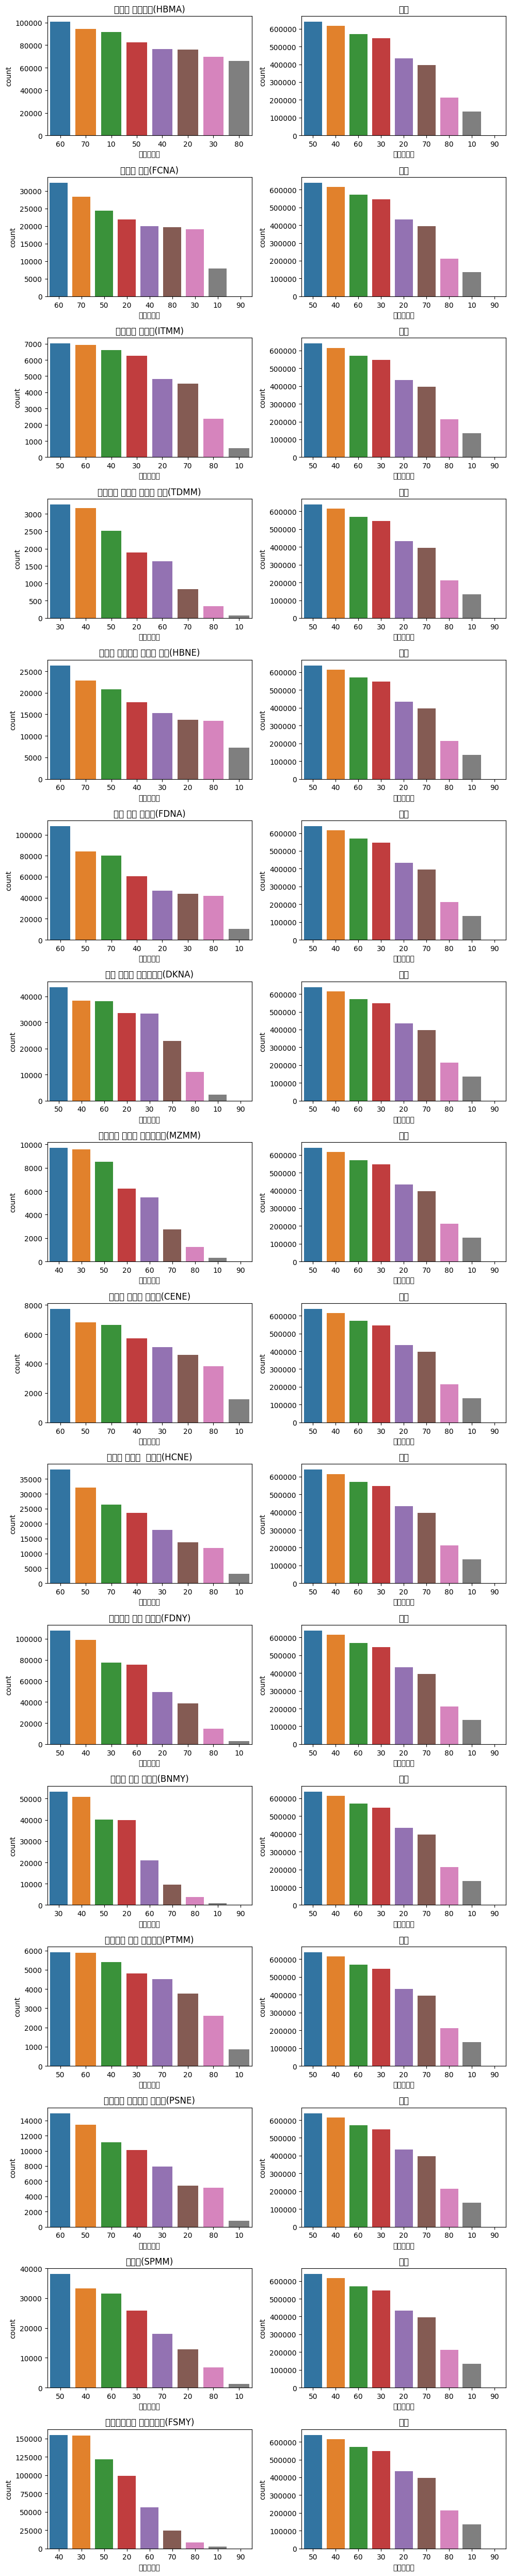

In [10]:
plt.figure(figsize=(10,50))
group = 1
group1 = 2
for i in range(1,5):
    for j in range(1,5):
        plt.subplot(len(group_ratio['그룹']), 2, group)
#         plt.xticks(rotation = 90)
        sns.countplot(x = '연령대코드', data = data[data['최종등급'] == f"{i}{j}"],
                order = data[data['최종등급'] == f"{i}{j}"]['연령대코드'].value_counts().index)
        plt.title(mapper[f"{i}{j}"])

        plt.subplot(len(group_ratio['그룹']), 2, group1)
#         plt.xticks(rotation = 90)
        sns.countplot(x = '연령대코드', data = data, order = data['연령대코드'].value_counts().index)
        plt.title('전체')
        group += 2
        group1 += 2
        plt.tight_layout()
plt.show()

In [11]:
data['접수월'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3548449 entries, 0 to 3548448
Series name: 접수월
Non-Null Count    Dtype 
--------------    ----- 
3548449 non-null  object
dtypes: object(1)
memory usage: 27.1+ MB


In [12]:
data['날짜'] = pd.to_datetime(data['접수월'], format='%Y%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548449 entries, 0 to 3548448
Data columns (total 15 columns):
 #   Column      Dtype         
---  ------      -----         
 0   접수월         object        
 1   가맹점업종분류명_대  object        
 2   가맹점업종분류명    object        
 3   연령대코드       object        
 4   성별코드        object        
 5   광역시도명       object        
 6   시군구명        object        
 7   금액지표        float64       
 8   건수지표        float64       
 9   금액등급        int64         
 10  건수등급        int64         
 11  최종등급        object        
 12  count       int64         
 13  그룹          object        
 14  날짜          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 406.1+ MB


In [13]:
group_date = data.groupby(['그룹', '날짜']).agg({'건수지표' : 'sum','금액지표':'sum'}).reset_index()
group_date

,그룹,날짜,건수지표,금액지표
0,가성비를 추구하는 라이퍼(PSNE),2022-07-01,996324.0,248696.0
1,가성비를 추구하는 라이퍼(PSNE),2022-08-01,976890.0,244943.0
2,가성비를 추구하는 라이퍼(PSNE),2022-09-01,957577.0,236425.0
3,가성비를 추구하는 라이퍼(PSNE),2022-10-01,967601.0,236932.0
4,가성비를 추구하는 라이퍼(PSNE),2022-11-01,948795.0,234406.0
...,...,...,...,...
187,활기찬 액티비티 라이프 리더(HBNE),2023-02-01,5502125.0,1872062.0
188,활기찬 액티비티 라이프 리더(HBNE),2023-03-01,6857347.0,2422070.0
189,활기찬 액티비티 라이프 리더(HBNE),2023-04-01,6987533.0,2444103.0
190,활기찬 액티비티 라이프 리더(HBNE),2023-05-01,7394889.0,2563634.0


In [16]:
그룹전체건수금액 =  data.groupby(['날짜']).agg({'건수지표' : 'sum','금액지표':'sum'}).reset_index()
그룹전체건수금액

,날짜,건수지표,금액지표
0,2022-07-01,236467403.0,9.062236e+08
1,2022-08-01,236475047.0,9.212548e+08
2,2022-09-01,231182035.0,9.182644e+08
3,2022-10-01,250265353.0,9.499659e+08
4,2022-11-01,238959202.0,1.010636e+09
5,2022-12-01,236125547.0,1.002146e+09
6,2023-01-01,216773075.0,9.551130e+08
7,2023-02-01,206906931.0,7.372095e+08
8,2023-03-01,242974811.0,1.305336e+09
9,2023-04-01,238144858.1,8.707494e+08


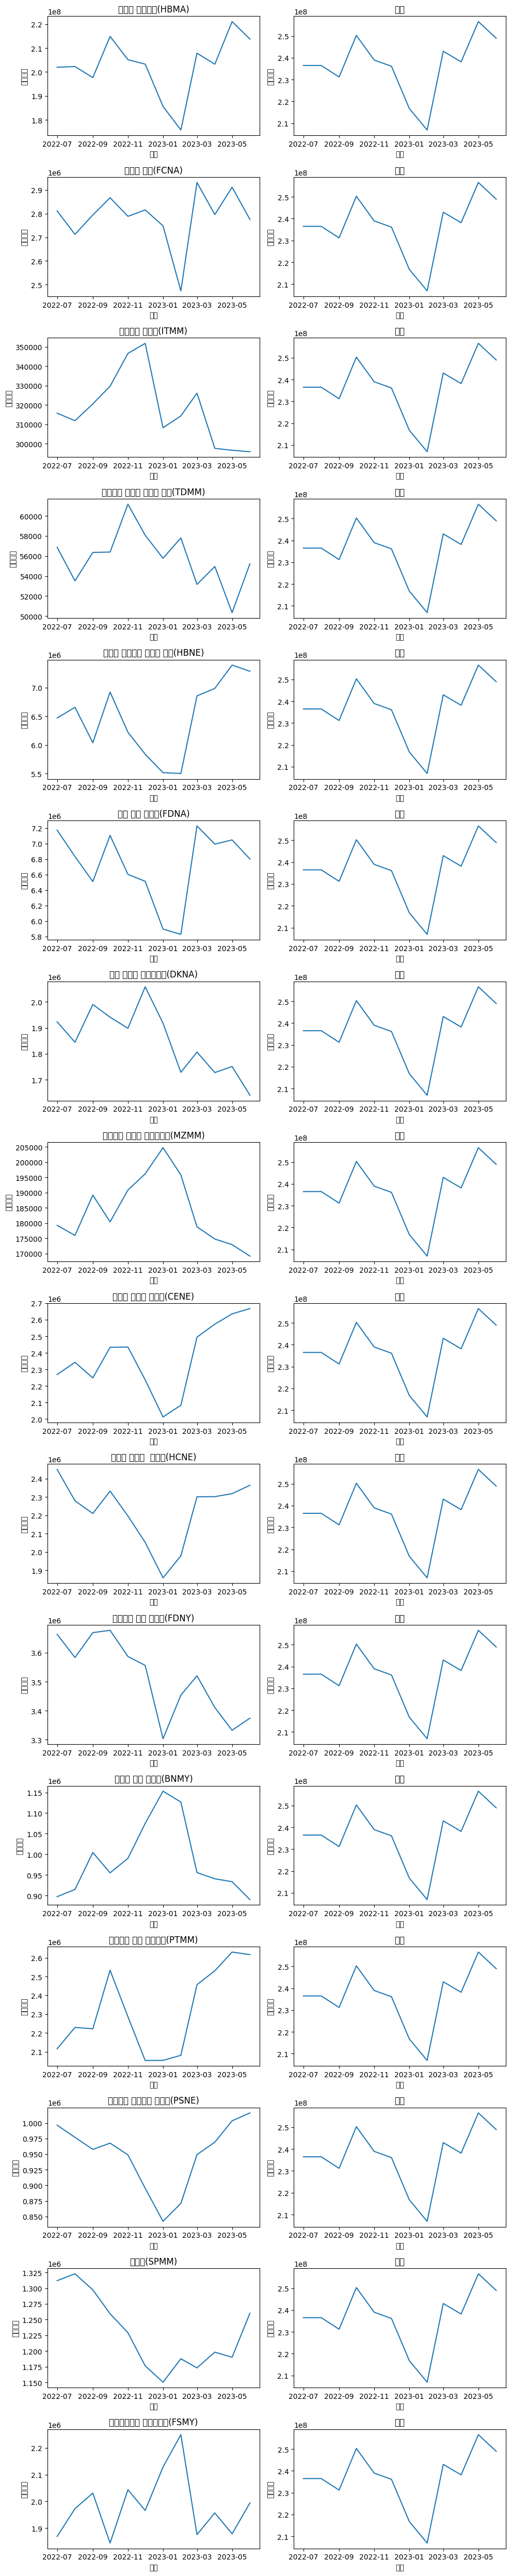

In [17]:
plt.figure(figsize=(10,50))
group = 1
group1 = 2
for i in range(1,5):
    for j in range(1,5):
        plt.subplot(len(group_ratio['그룹']), 2, group)
#         plt.xticks(rotation = 90)
        sns.lineplot(x = group_date[group_date['그룹'] == mapper[f"{i}{j}"]]['날짜'], y = group_date[group_date['그룹'] == mapper[f"{i}{j}"]]['건수지표'])
#                 order = data[data['최종등급'] == f"{i}{j}"]['가맹점업종분류명_대'].value_counts().index)
#         sns.lineplot(x = 그룹전체건수['날짜'], y = 그룹전체건수['건수지표'])
        plt.title(mapper[f"{i}{j}"])



        plt.subplot(len(group_ratio['그룹']), 2, group1)
#         plt.xticks(rotation = 90)
        sns.lineplot(x = 그룹전체건수금액['날짜'], y = 그룹전체건수금액['건수지표'])
        plt.title('전체')
        group += 2
        group1 += 2
        plt.tight_layout()
plt.show()